In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from wandb_utils import *
from plotting import *

sns.set(style="ticks")

In [14]:
runs = [
    "kietzmannlab/gradient_subspaces_new_knobs/g22jfbtd",  # baseline
    "kietzmannlab/gradient_subspaces_new_knobs/rtctgs34",  # subspace null 1.0 range 0.0
    "kietzmannlab/gradient_subspaces_new_knobs/06arrsik",  # subspace null 1.0 range 0.05
    "kietzmannlab/gradient_subspaces_new_knobs/u2vzxngg",  # subspace null 1.0 range 0.1
    "kietzmannlab/gradient_subspaces_new_knobs/8twk325w",  # subspace null 1.0 range 0.2
    "kietzmannlab/gradient_subspaces_new_knobs/mw9rkze0",  # subspace null 1.0 range 0.3
    "kietzmannlab/gradient_subspaces_new_knobs/u1ie20dn",  # subspace null 1.0 range 0.4
    "kietzmannlab/gradient_subspaces_new_knobs/9u0bdjau",  # subspace null 0.9 range 0.0
    "kietzmannlab/gradient_subspaces_new_knobs/laph18ka",  # subspace null 0.8 range 0.0
    "kietzmannlab/gradient_subspaces_new_knobs/r7bhqiyx",  # subspace null 0.7 range 0.0
    "kietzmannlab/gradient_subspaces_new_knobs/nnseac8q",  # subspace null 0.5 range 0.0
    "kietzmannlab/gradient_subspaces_new_knobs/o9rkxjur",  # subspace null 0.4 range 0.0
    "kietzmannlab/gradient_subspaces_new_knobs/rg02rqz4",  # subspace null 0.2 range 0.0
    "kietzmannlab/gradient_subspaces_new_knobs/n0r7ehls",  # subspace null 0.1 range 0.0
    "kietzmannlab/gradient_subspaces_new_knobs/m22uilbm",  # subspace null 0.0 range 0.0
    "kietzmannlab/gradient_subspaces_new/dhjx41rd",
    "kietzmannlab/gradient_subspaces_new/a1cdj8le",
    "kietzmannlab/gradient_subspaces_new/nzo53dxk",
    "kietzmannlab/gradient_subspaces_new/m0ostm8u",
    "kietzmannlab/gradient_subspaces_new/o9iqstp7",
    "kietzmannlab/gradient_subspaces_new/vitf4mm7",
    "kietzmannlab/gradient_subspaces_new/apiy2tkp",
    "kietzmannlab/gradient_subspaces_new/m7hs1ptf",
    "kietzmannlab/gradient_subspaces_new/8b6x66h7",
]

projectdir = "gradient_subspaces_knobs_new_adam"


print(runs)
data = [load_history(is_wandb=True, projectdir=projectdir, logpath=run) for run in runs]

dfs, paths, wandb_names = list(zip(*data))


names = [
    "baseline",
    "subspace null 1.0 range 0.0",
    "subspace null 1.0 range 0.05",
    "subspace null 1.0 range 0.1",
    "subspace null 1.0 range 0.2",
    "subspace null 1.0 range 0.3",
    "subspace null 1.0 range 0.4",
    "subspace null 0.9 range 0.0",
    "subspace null 0.8 range 0.0",
    "subspace null 0.7 range 0.0",
    "subspace null 0.5 range 0.0",
    "subspace null 0.4 range 0.0",
    "subspace null 0.2 range 0.0",
    "subspace null 0.1 range 0.0",
    "subspace null 0.0 range 0.0",
    "ewc 0.001",
    "ewc 0.01",
    "ewc 0.1",
    "ewc 1.0",
    "ewc 10.0",
    "ewc 100.0",
    "ewc 1000.0",
    "ewc 10000.",
    "ewc 100000.",
]

savedir = f"figures/{projectdir}/"
os.makedirs(savedir, exist_ok=True)

for w, n in zip(wandb_names, names):
    print(w, n)

['kietzmannlab/gradient_subspaces_new_knobs/g22jfbtd', 'kietzmannlab/gradient_subspaces_new_knobs/rtctgs34', 'kietzmannlab/gradient_subspaces_new_knobs/06arrsik', 'kietzmannlab/gradient_subspaces_new_knobs/u2vzxngg', 'kietzmannlab/gradient_subspaces_new_knobs/8twk325w', 'kietzmannlab/gradient_subspaces_new_knobs/mw9rkze0', 'kietzmannlab/gradient_subspaces_new_knobs/u1ie20dn', 'kietzmannlab/gradient_subspaces_new_knobs/9u0bdjau', 'kietzmannlab/gradient_subspaces_new_knobs/laph18ka', 'kietzmannlab/gradient_subspaces_new_knobs/r7bhqiyx', 'kietzmannlab/gradient_subspaces_new_knobs/nnseac8q', 'kietzmannlab/gradient_subspaces_new_knobs/o9rkxjur', 'kietzmannlab/gradient_subspaces_new_knobs/rg02rqz4', 'kietzmannlab/gradient_subspaces_new_knobs/n0r7ehls', 'kietzmannlab/gradient_subspaces_new_knobs/m22uilbm', 'kietzmannlab/gradient_subspaces_new/dhjx41rd', 'kietzmannlab/gradient_subspaces_new/a1cdj8le', 'kietzmannlab/gradient_subspaces_new/nzo53dxk', 'kietzmannlab/gradient_subspaces_new/m0ostm8u

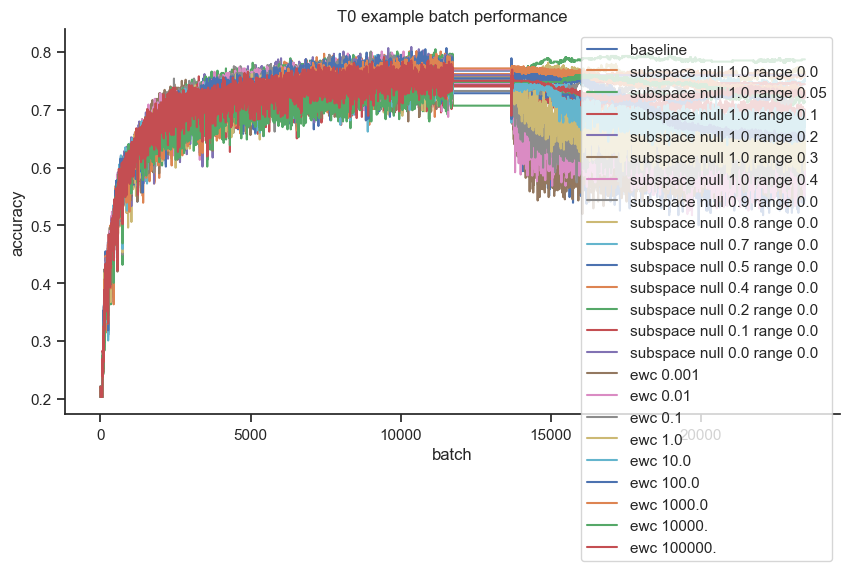

In [15]:
plt.figure(figsize=(10, 5))

for df, name in zip(dfs, names):
    plot_t0_performance(df, plot_kwargs={"label": name})
plt.legend()
plt.xlabel("batch")
plt.ylabel("accuracy")
plt.title("T0 example batch performance")
sns.despine()
plt.savefig(savedir + "t0_performance.pdf", bbox_inches="tight")

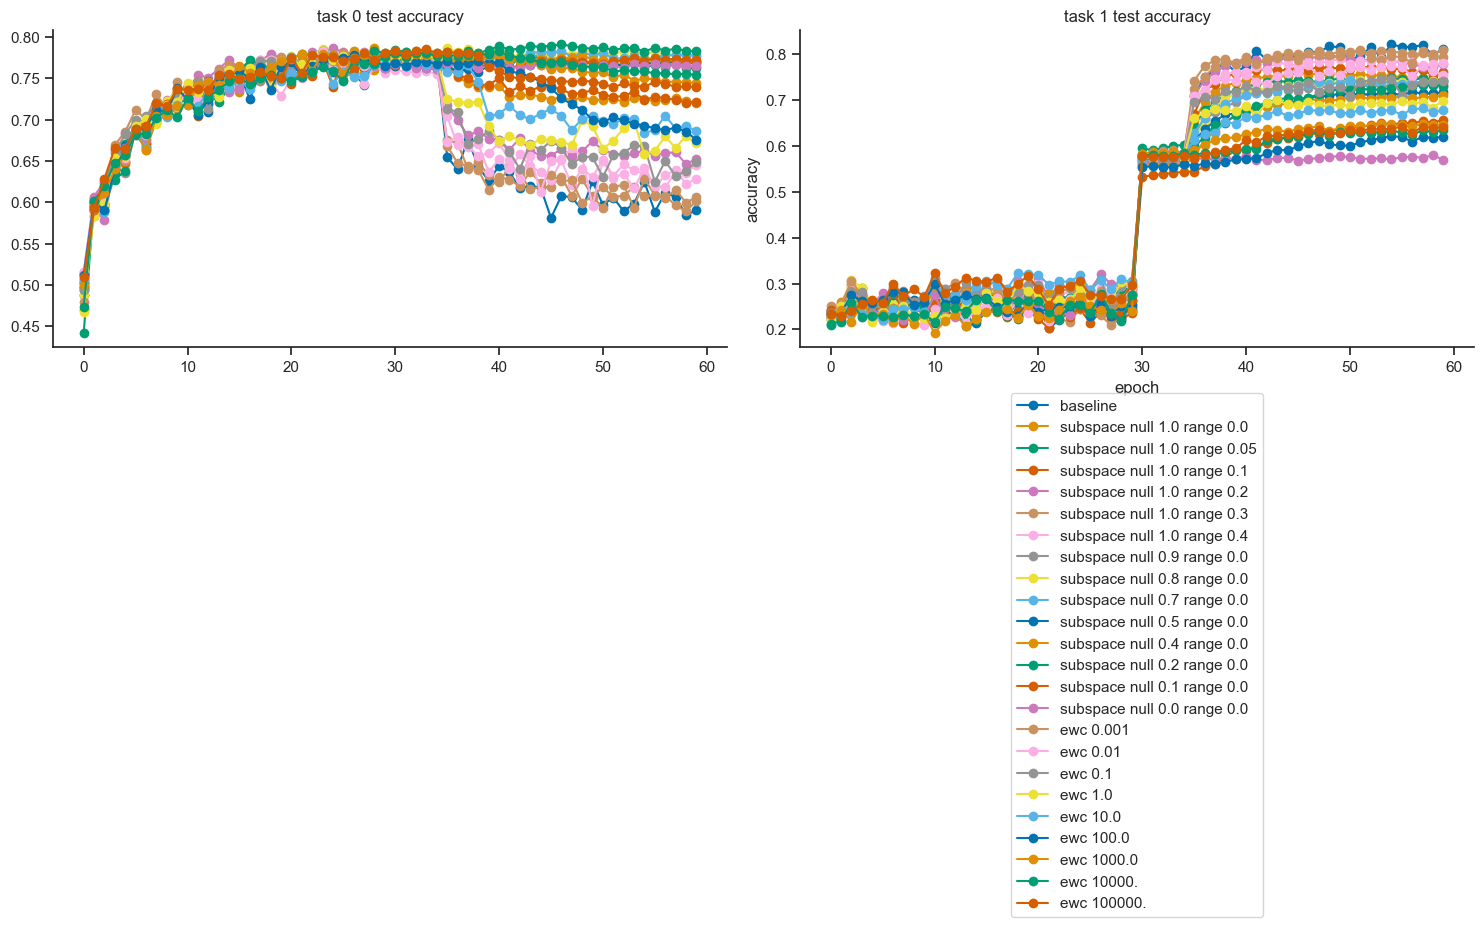

In [16]:
colors = sns.color_palette("colorblind", len(dfs))
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()
for df, name, color in zip(dfs, names, colors):
    t0_acc = df["performance/test_accuracy_task_0"].dropna()
    t1_acc = df["performance/test_accuracy_task_1"].dropna()
    epoch = np.arange(len(t0_acc))
    axes[0].plot(epoch, t0_acc, marker="o", c=color, alpha=1.0)
    axes[1].plot(epoch, t1_acc, label=name, marker="o", c=color, alpha=1.0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
sns.despine()
# legend under plot
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, -0.12), loc="upper center", ncol=1)
axes[0].set_title("task 0 test accuracy")
axes[1].set_title("task 1 test accuracy")

# save
plt.savefig(savedir + "test_accuracy.pdf", bbox_inches="tight")

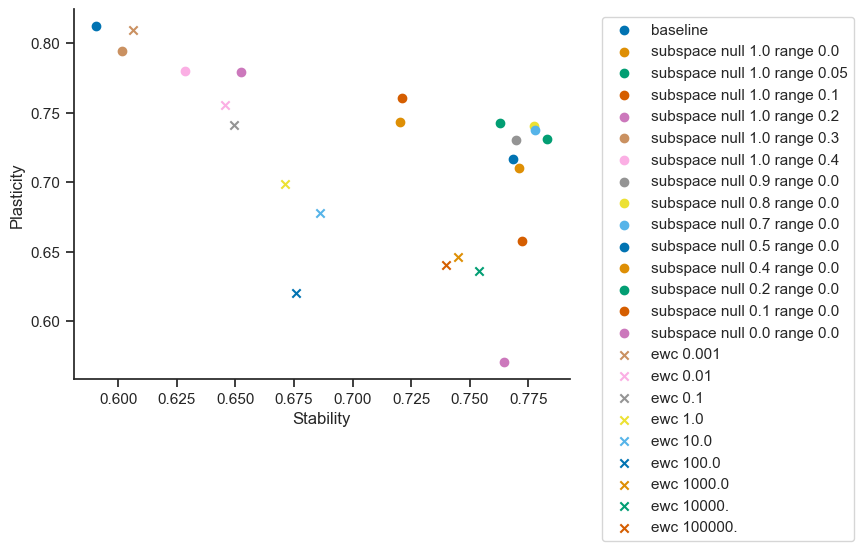

In [17]:
markers = ["o"] * 15 + ["x"] * 9
for df, name, color, marker in zip(dfs, names, colors, markers):
    t0_acc = df["performance/test_accuracy_task_0"].dropna().values[-1]
    t1_acc = df["performance/test_accuracy_task_1"].dropna().values[-1]
    plt.scatter(t0_acc, t1_acc, label=name, color=color, marker=marker)
plt.xlabel("Stability")
plt.ylabel("Plasticity")
# legend on right of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", ncol=1)

sns.despine()
plt.savefig(savedir + "stability_plasticity.pdf", bbox_inches="tight")

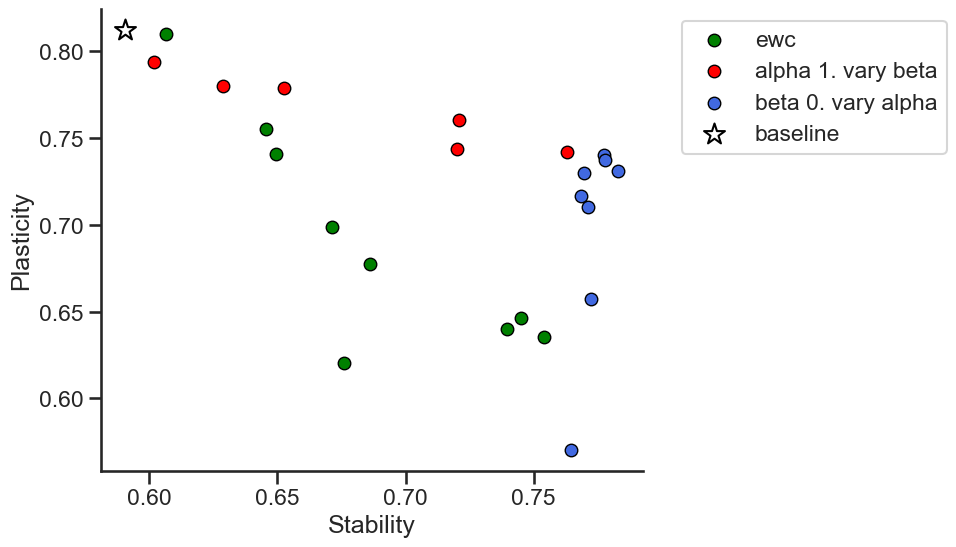

In [19]:
# set talk context
sns.set_context("talk")
ewc_lambdas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
ewc_stabilities = [
    df["performance/test_accuracy_task_0"].dropna().values[-1] for df in dfs[15:]
]
ewc_plasticities = [
    df["performance/test_accuracy_task_1"].dropna().values[-1] for df in dfs[15:]
]

subspace_null_stabilities = [
    df["performance/test_accuracy_task_0"].dropna().values[-1] for df in dfs[1:7]
]
subspace_null_plasticities = [
    df["performance/test_accuracy_task_1"].dropna().values[-1] for df in dfs[1:7]
]

subspace_range_stabilities = [
    df["performance/test_accuracy_task_0"].dropna().values[-1] for df in dfs[7:15]
]
subspace_range_plasticities = [
    df["performance/test_accuracy_task_1"].dropna().values[-1] for df in dfs[7:15]
]

baseline_stability = dfs[0]["performance/test_accuracy_task_0"].dropna().values[-1]
baseline_plasticity = dfs[0]["performance/test_accuracy_task_1"].dropna().values[-1]

plt.figure(figsize=(7, 6))
plt.scatter(
    ewc_stabilities,
    ewc_plasticities,
    label="ewc",
    color="green",
    marker="o",
    edgecolors="black",
    linewidths=1.0,
)
plt.scatter(
    subspace_null_stabilities,
    subspace_null_plasticities,
    marker="o",
    color="red",
    label="alpha 1. vary beta",
    edgecolors="black",
    linewidths=1.0,
)
plt.scatter(
    subspace_range_stabilities,
    subspace_range_plasticities,
    marker="o",
    color="royalblue",
    label="beta 0. vary alpha",
    edgecolors="black",
    linewidths=1.0,
)
# white start with black border
plt.scatter(
    baseline_stability,
    baseline_plasticity,
    marker="*",
    s=250,
    color="white",
    edgecolors="black",
    linewidths=1.5,
    label="baseline",
)
plt.xlabel("Stability")
plt.ylabel("Plasticity")
# legend outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", ncol=1)
sns.despine()

plt.savefig("/Users/daniel/Desktop/stability_plasticity.pdf", bbox_inches="tight")

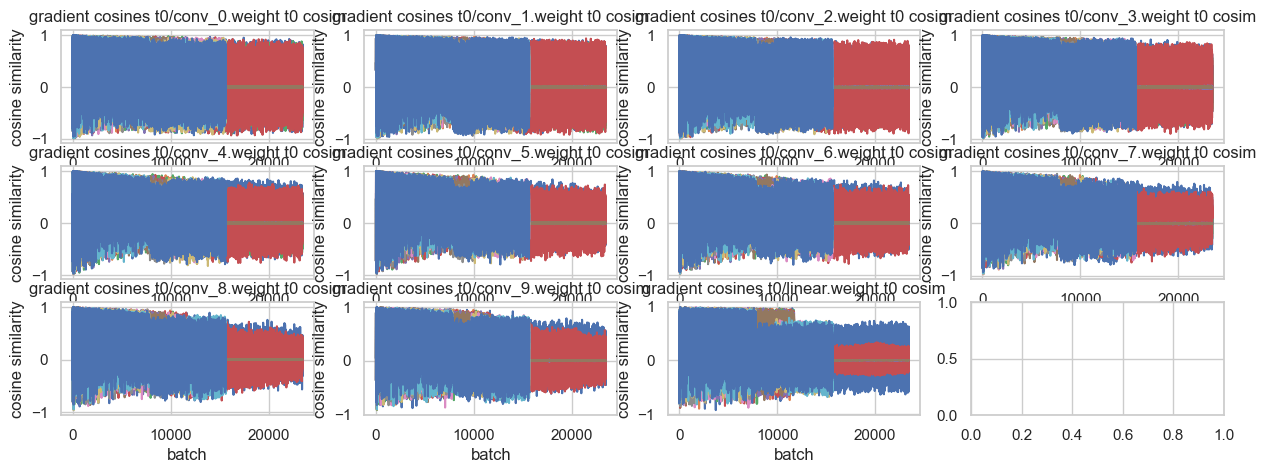

In [6]:
weight_names = []
for i in range(10):
    weight_names.append(f"conv_{i}")
weight_names.append(f"linear")

fig, axes = plt.subplots(3, 4, figsize=(15, 5))
for df, name in zip(dfs, names):
    plot_cosine_with_t0(
        axes, df, weight_names=weight_names, plot_kwargs={"label": name, "alpha": 1.0}
    )

In [7]:
# plot only for linear layer
# get all columns starting with gradient
df.filter(regex="gradient.*").columns

Index(['gradient cosines t0/conv_1.weight t0 cosim eval',
       'gradient norms/conv_6.weight norm range',
       'gradient cosines t0/conv_2.weight t0 cosim train',
       'gradient cosines t0/conv_3.weight t0 cosim eval',
       'gradient norms/conv_2.weight norm with reg',
       'gradient cosines t0/conv_0.weight t0 cosim eval',
       'gradient norms/conv_7.weight norm with reg',
       'gradient cosines t0/conv_9.weight t0 cosim train',
       'gradient norms/linear.weight norm range',
       'gradient norms/linear.weight norm without reg',
       'gradient norms/conv_8.weight norm with reg',
       'gradient norms/linear.weight norm nullspace',
       'gradient norms/conv_1.weight norm without reg',
       'gradient cosines t0/conv_6.weight t0 cosim train',
       'gradient cosines t0/conv_9.weight t0 cosim eval',
       'gradient cosines t0/conv_4.weight t0 cosim eval',
       'gradient norms/conv_2.weight norm without reg',
       'gradient norms/conv_6.weight norm with reg',

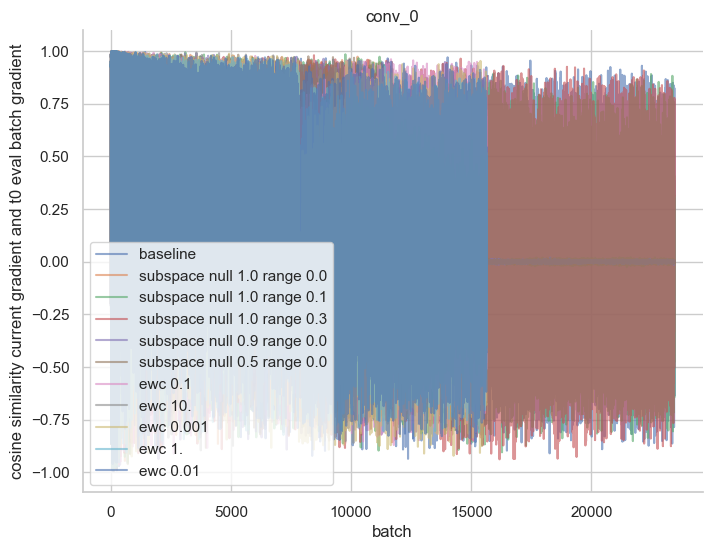

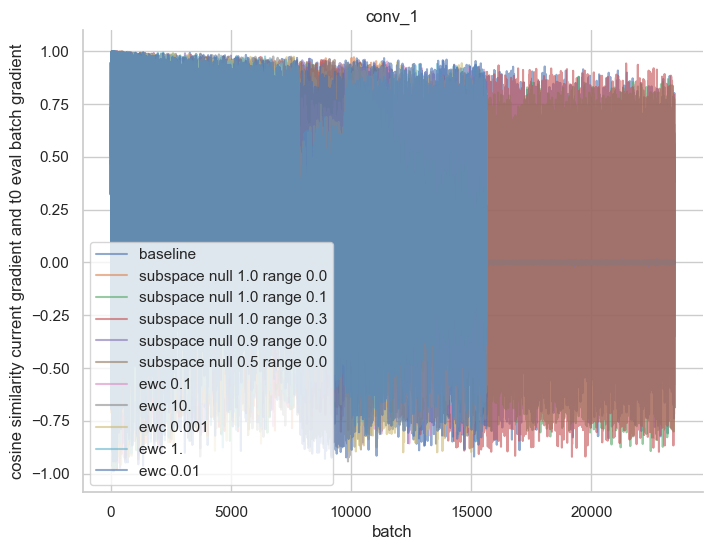

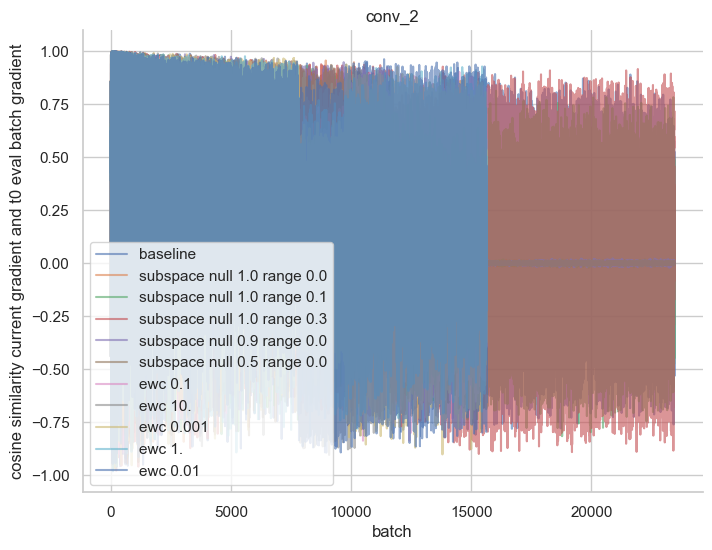

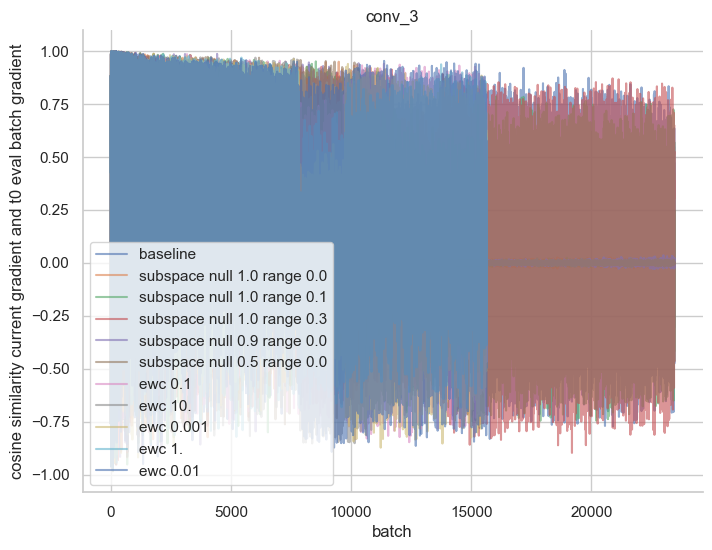

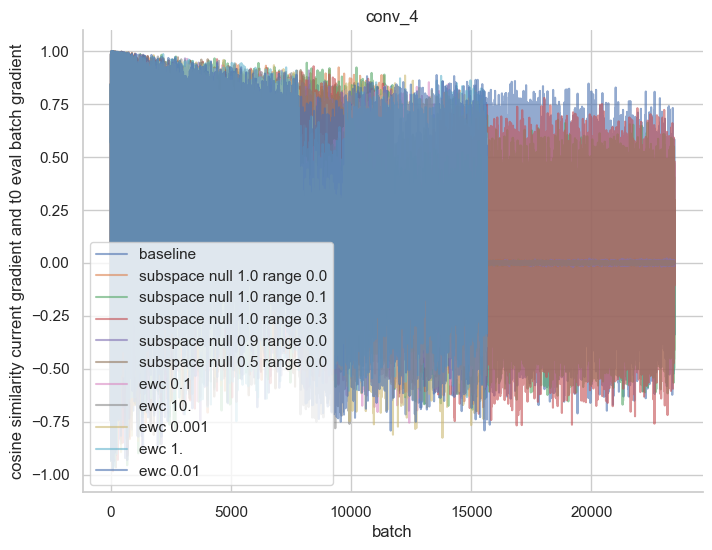

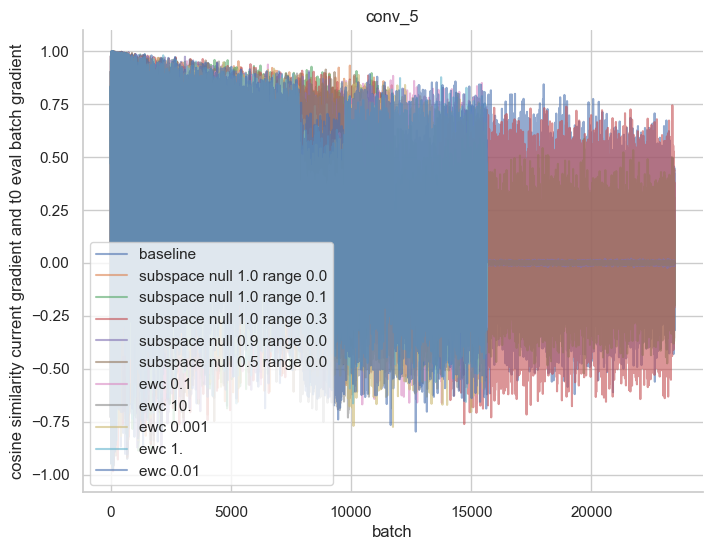

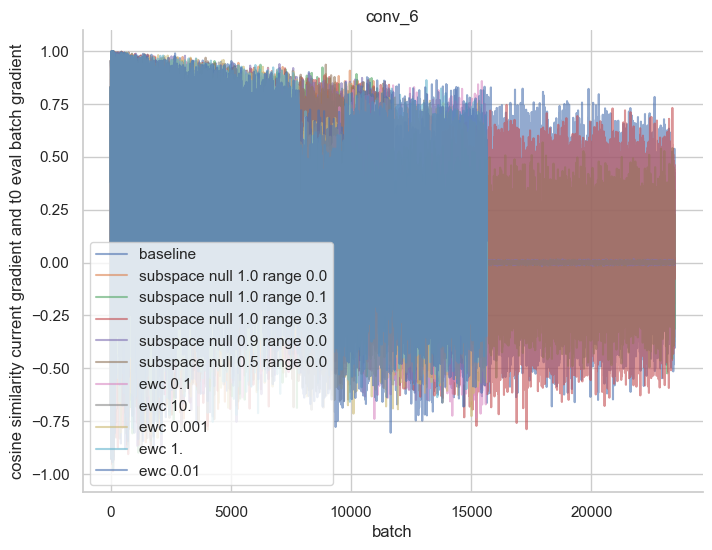

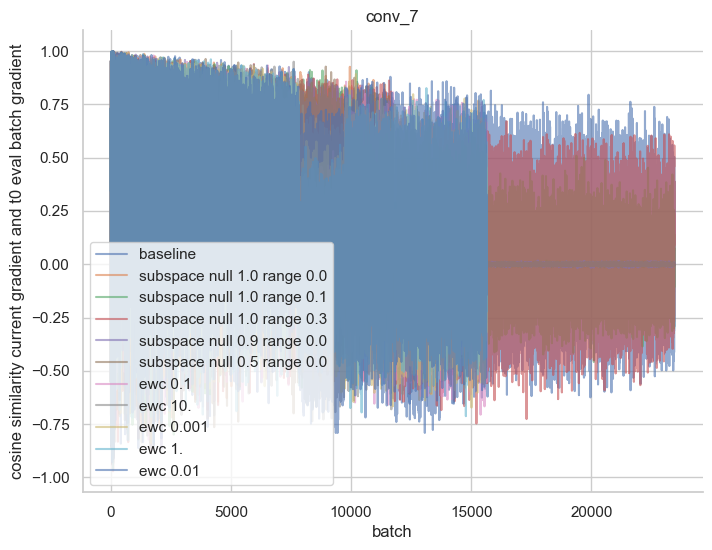

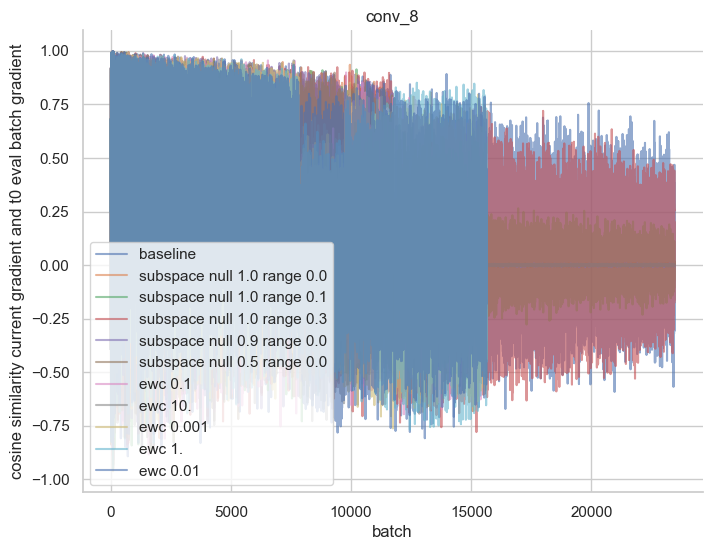

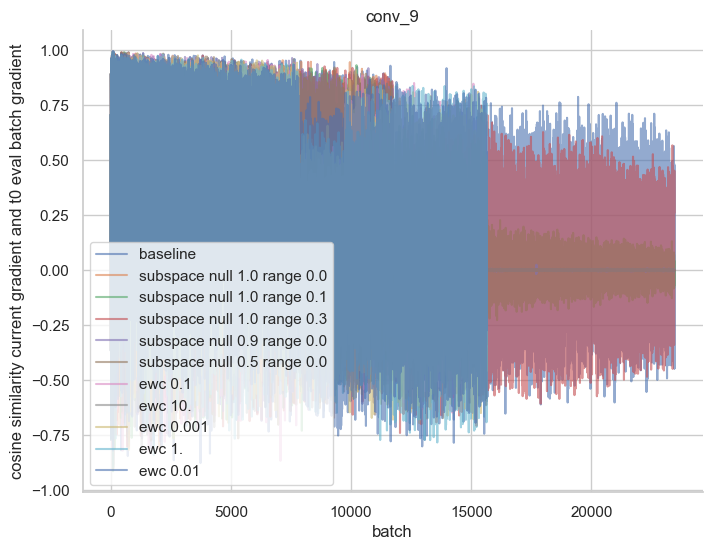

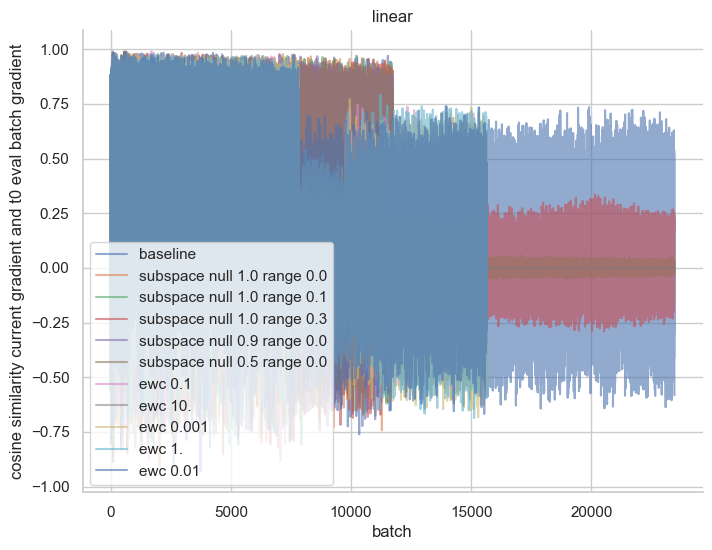

In [8]:
def plot_cosines_with_t0(dfs, names, layer_name):
    fig = plt.figure(figsize=(8, 6))
    for df, name in zip(dfs, names):
        key = f"gradient cosines t0/{layer_name}.weight t0 cosim eval"
        ys = df[key].dropna().values
        xs = np.arange(len(ys))
        plt.plot(xs, ys, label=name, alpha=0.6)
    plt.legend()
    sns.despine()
    plt.xlabel("batch")
    plt.ylabel("cosine similarity current gradient and t0 eval batch gradient")
    plt.title(layer_name)
    return fig


for layer_name in weight_names:
    fig = plot_cosines_with_t0(dfs, names, layer_name)
    fig.savefig(savedir + f"cosines_t0_{layer_name}.pdf", bbox_inches="tight")

In [9]:
weight_names

['conv_0',
 'conv_1',
 'conv_2',
 'conv_3',
 'conv_4',
 'conv_5',
 'conv_6',
 'conv_7',
 'conv_8',
 'conv_9',
 'linear']

In [10]:
def plot_cosines_with_unregularised(dfs, names, layer_name):
    fig = plt.figure(figsize=(8, 6))
    for df, name in zip(dfs, names):
        print(name)
        key = f"gradient cosines/{layer_name}.weight cosim"
        ys = df[key].astype(float).dropna().values  # ensure float
        xs = np.arange(len(ys))
        # make sure xs and ys are not empty
        if len(xs) == 0 or len(ys) == 0:
            print(f"WARNING {name} has no data for {layer_name}")
            continue
        plt.plot(xs, ys, label=name, alpha=0.9)
    plt.legend()
    sns.despine()
    plt.xlabel("batch")
    plt.ylabel("cosine similarity unregularised vs regularised gradient")
    plt.title(layer_name)
    return fig


for layer_name in weight_names:
    print(f">>> {layer_name}")
    fig = plot_cosines_with_unregularised(dfs, names, layer_name)
    fig.savefig(
        savedir + f"cosines_current_batch_{layer_name}.pdf", bbox_inches="tight"
    )

>>> conv_0
baseline


KeyError: 'gradient cosines/conv_0.weight cosim'

<Figure size 800x600 with 0 Axes>

In [ ]:
# plot gradient norms in nullspace vs range at each layer

for layer in weight_names:
    fig = plt.figure(figsize=(8, 6))
    ax = plt.gca()
    for df, name, color, marker in zip(dfs, names, colors, markers):
        batches = df["batch"].dropna()
        history_batches = df.loc[batches.index]

        grad_norm_range = history_batches[f"gradient norms/{layer}.weight norm range"]
        grad_norm_null = history_batches[
            f"gradient norms/{layer}.weight norm nullspace"
        ]

        ax.scatter(
            grad_norm_range, grad_norm_null, s=2, color=color, label=name, marker=marker
        )
    ax.set_xlabel("gradient norm range")
    ax.set_ylabel("gradient norm nullspace")
    plt.legend()
    sns.despine()
    plt.title(layer)
    plt.savefig(savedir + f"gradient_norms_range_null_{layer}.pdf", bbox_inches="tight")

In [ ]:
subspace_names = [f"subspace_{i}" for i in range(11)]

for subspace_name in subspace_names:
    plt.figure()
    for df, name, color in zip(dfs, names, colors):
        subspace_dims = df[f"subspaces/{subspace_name}"].dropna()
        history_subdim = df.loc[subspace_dims.index]
        batch = history_subdim["batch"]
        plt.plot(batch, subspace_dims, label=name, color=color, marker="o")
    plt.legend()
    plt.xlabel("batch")
    plt.ylabel("subspace dimension")
    # move legend outside
    plt.legend(bbox_to_anchor=(0.5, -0.12), loc="upper center", ncol=1)
    plt.title(subspace_name)
    plt.savefig(savedir + f"subspace_dims_{subspace_name}.pdf", bbox_inches="tight")